In [1]:
import numpy as np
import matplotlib.pyplot as plt

(100,)
(100,)


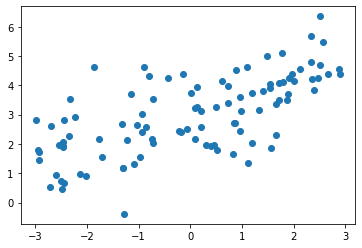

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

print(x.shape)
print(y.shape)

plt.scatter(x, y)
plt.show()

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=666)

In [5]:
from sklearn.metrics import mean_squared_error

lin_reg_poly = polynomial_regression(degree=20)
lin_reg_poly.fit(X_train, y_train)
y_predicted_poly = lin_reg_poly.predict(X_test)

mean_squared_error(y_test, y_predicted_poly)

6.802074916817279

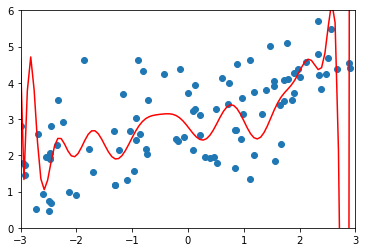

In [6]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = lin_reg_poly.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color="r")
plt.axis([-3, 3, 0, 6])
plt.show()

### 岭回归

In [7]:
from sklearn.linear_model import Ridge

def ridge_regression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("risge_reg", Ridge(alpha=alpha))
    ])

In [8]:
ridge1_reg = ridge_regression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predicted = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predicted)

1.0730891430396938

### LASSO回归

In [9]:
import numpy as np
import matplotlib.pyplot as plt

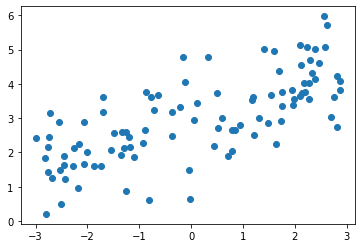

In [10]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=666)

In [12]:
from sklearn.linear_model import Lasso
def lasso_regression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("risge_reg", Ridge(alpha=alpha))
    ])

In [13]:
lasso_reg = lasso_regression(20, 0.01)
lasso_reg.fit(X_train, y_train)
y2_predicted = lasso_reg.predict(X_test)
mean_squared_error(y_test, y2_predicted)

0.8518937780777819